In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
def readData(data_folder):
    """Reading captured data for different classes from specified data folder
    
    Parameter
    ----------
    data_folder : data folder path -> string
    
    Returns:
    ----------
    x_data : input data that include roll & pitch angles data
    y_data : different class labels 
    """
    x_data = np.array([])
    y_data = np.array([])
    label_dict = {"Stop" : 0, "Forward" : 1, "Right" : 2, "Backward" : 3, "Left" : 4}
    for key, value in label_dict.items():
        file = open(data_folder + key + "Label.txt", "r")
        
        while True:
            line = file.readline()
            numbers_in_line = []
            if not line:
                break
            for word in line.split():
                try:
                    numbers_in_line.append(float(word))
                except ValueError:
                    pass
            x_data = np.append(x_data, np.array(numbers_in_line[0:2]))
            y_data = np.append(y_data, int(numbers_in_line[-1]))
    x_data = x_data.reshape((-1, 2))
    return x_data, y_data

def make_meshgrid(x, y, h=1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
x_data, y_data = readData("../../CapturedData/")
x_data.shape,len(y_data)

((11303, 2), 11303)

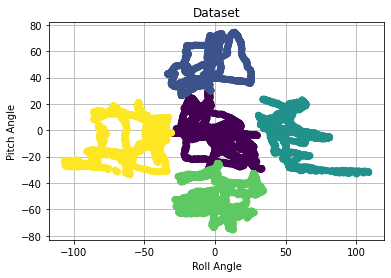

In [4]:
plt.figure()
plt.scatter(x_data[:,0],x_data[:,1], c = y_data, zorder=20)
plt.xlabel('Roll Angle')
plt.ylabel('Pitch Angle')
plt.title('Dataset')
plt.grid()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=40)
x_train, y_train = shuffle(x_train, y_train, random_state = 2)
x_test, y_test = shuffle(x_test, y_test, random_state = 2)


In [6]:
# check wether the dataset is balanced or not
np.unique(y_train, return_counts = True)

(array([0., 1., 2., 3., 4.]), array([2765, 1707, 2004, 1528, 1603]))

/home/amirhosein/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


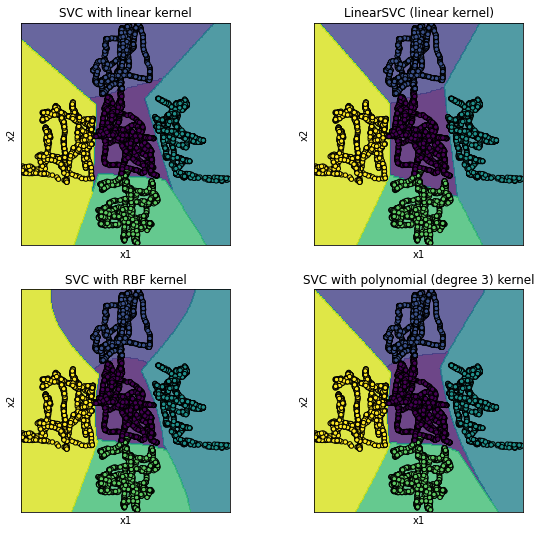

In [24]:
X = x_train
y = y_train

class_weight=None
#class_weight='balanced'

models = (svm.SVC(kernel='linear',class_weight=class_weight),
          svm.LinearSVC(class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2,2,  figsize=(9, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

scores = []
y_pred = []
for clf, title, ax in zip(models, titles, sub.flatten()):
    y_pred.append(clf.predict(x_test))
    plot_contours(ax, clf, xx, yy,
                   alpha=0.8)
    ax.scatter(X0, X1, c=y, s=20, edgecolors='k')
    scores.append(clf.score(x_test,y_test))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [15]:
print('Accuracy of svm with linear kernel:',scores[0])
print('Accuracy of svm with LinearSVC (linear kernel):',scores[1])
print('Accuracy of svm with RBF kernel:',scores[2])
print('Accuracy of svm with polynomial (degree 3) kernel:',scores[3])

Accuracy of svm with linear kernel: 0.9946933962264151
Accuracy of svm with LinearSVC (linear kernel): 0.9764150943396226
Accuracy of svm with RBF kernel: 0.9935141509433962
Accuracy of svm with polynomial (degree 3) kernel: 0.9946933962264151


In [29]:
for i in range(4):
    confusion_mtx = confusion_matrix(y_test, y_pred[i])
    print('classification report of ' + titles[i] + ':')
    print(classification_report(y_test, y_pred[i]))
    print('confusion matrix:')
    print(confusion_mtx)
    print('-'*50)

classification report of SVC with linear kernel:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       493
         1.0       0.99      1.00      1.00       311
         2.0       1.00      1.00      1.00       331
         3.0       1.00      0.98      0.99       299
         4.0       1.00      1.00      1.00       262

    accuracy                           0.99      1696
   macro avg       1.00      1.00      1.00      1696
weighted avg       0.99      0.99      0.99      1696

confusion matrix:
[[489   3   0   1   0]
 [  0 311   0   0   0]
 [  0   0 331   0   0]
 [  5   0   0 294   0]
 [  0   0   0   0 262]]
--------------------------------------------------
classification report of LinearSVC (linear kernel):
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       493
         1.0       0.93      1.00      0.96       311
         2.0       1.00      1.00      1.00       331
        